In [58]:
from math import ceil, floor, log10, sqrt, exp, pi
from random import random, uniform
import numpy as np
import matplotlib.pyplot as plt
from bitarray import bitarray

 Get the limits of the point in each coordinate

In [76]:
limits = [
    [-5, 5]
]

restrictions = [
    lambda point: True,
]


def toAllRestrictions(data, restrictions):
    for restriction in restrictions:
        if restriction(data) == False: return False
    
    return True


### Note: 

A gen is a sequence of 1 and 0,for example `[010101]`

and it is split in each coordinate `[[01], [0101]]`

So what we are going to do is calculate each gen size

In [14]:
precisitionBits = 1

def getNumberOfBits(rangeOfValues, precisitionBits):
    return ceil(log10(rangeOfValues * 10 ** precisitionBits) / log10(2))

def getRange(limit): return limit[1] - limit[0]

sizeOfEachGen = [getNumberOfBits(getRange(limit), precisitionBits) for limit in limits]
genTotalSize = sum(sizeOfEachGen)

print(sizeOfEachGen)
print(genTotalSize)

[7]
7


Create an initial poblation

In [74]:
def getRandomBob():
    return bitarray([(random() > 0.5) for i in range(genTotalSize)])

specialPoblation = [
    bitarray([True for i in range(genTotalSize)]),
    bitarray([False for i in range(genTotalSize)]),
    bitarray([i % 2 == False for i in range(genTotalSize)]),
]

randomPoblation = [bitarray(genTotalSize) for i in range(3)]

poblation = specialPoblation
print(poblation)

[bitarray('1111111'), bitarray('0000000'), bitarray('1010101')]


Now create the points that represent the poblation

In [78]:
def calculateValue(gen, limit):
    rangeOfValues = getRange(limit)
    jump = (rangeOfValues) / (2 ** gen.length() - 1)  
    return jump * int(gen.to01(), 2) + limit[0]

def getCoordinateValue(gen, sizeOfEachGen, limits):
    results = []
    actualPosition = 0
    for i, size in enumerate(sizeOfEachGen):
        currentGen = gen[actualPosition: actualPosition + size]
        results.append(calculateValue(currentGen, limits[i]))
        actualPosition += size
    
    return results


def getValidPoblation(poblation, restrictions):
    for bob in poblation:
        
        value = getCoordinateValue(bob, sizeOfEachGen, limits)
        while (toAllRestrictions(value, restrictions) == False):
            bob = getRandomBob()
            value = getCoordinateValue(bob, sizeOfEachGen, limits)
    return poblation


poblation = getValidPoblation(poblation, restrictions)

poblationAsPoints = ([getCoordinateValue(bob, sizeOfEachGen, limits) for bob in poblation])
print (poblationAsPoints)

[[5.0], [-5.0], [1.6929133858267713]]


Define the z function

In [34]:
def z(point):
    return exp(-0.5 * point * point) / sqrt(2 * pi)

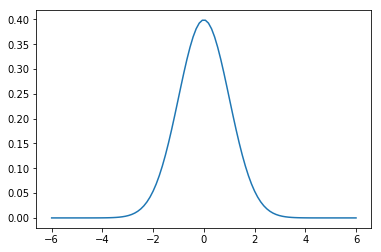

In [35]:
sample = np.linspace(-6, 6, 100)
y = [z(point) for point in sample]

plt.plot(sample, y)
plt.show()

Get the acumulate of the points

In [79]:
poblationValues = [z(point[0]) for point in poblationAsPoints]
print(poblationValues)

sumOfZ = sum(poblationValues)
poblationValuesPercentage = [value / sumOfZ * 100 for value in poblationValues]

poblationAcumulates = [None] * len(poblation)
poblationAcumulates[0] = poblationValuesPercentage[0]

for i in range(1, len(poblation)):
    poblationAcumulates[i] = poblationAcumulates[i-1] + poblationValuesPercentage[i]

print (poblationAcumulates)

[1.4867195147342979e-06, 1.4867195147342979e-06, 0.09518657184704732]
[0.0015618516826256526, 0.003123703365251305, 100.0]


Create n random numbers

In [100]:
randomNumbers = [uniform(0, 100) for i in range(len(poblation))]
print (randomNumbers)

[8.903660448163652, 85.16579480631465, 3.341193673758047]


In [101]:
toBeSaved = set()

for number in randomNumbers:
    i = 0
    while (poblationAcumulates[i] < number): i += 1
    toBeSaved.add(i)

newPoblation = []
for savedIndex in toBeSaved:
    newPoblation.append(poblation[savedIndex])
    
print (newPoblation)

[bitarray('1010101')]
